# DS325 Group Project 

# Introduction:
    According to a survey by the Council of Graduate Schools and the Graduate Record
    Examinations Board, in the fall of 2015, about 55 percent of all graduate students in STEM
    programs were from abroad. Meanwhile, in arts and humanities, the figure was about 16
    percent; in business, a little more than 18 percent. These things prove the attractiveness of
    graduate programs in the US to international students, including first-time graduate applicants
    who earned bachelor's degrees from universities outside the US. However, there is a fact that in
    many countries outside the US, due to the shortage of funding, undergraduate students do not
    have the opportunity to access research programs to gain research experience or publish
    papers. For this reason, we want to build a model to check if research experience plays a vital
    role in the application results of international applicants for graduate programs in the US.

    We intend to use the dataset https://www.kaggle.com/pandanup/college-admission-data-set that
    we found on Kaggle (license from U.S. Government Works). This dataset has 6 features:
        - gre
        - gpa
        - socioeconomic status
        - Gender_Male
        - race
        - rank (prestigious level of undergrad school)
    and we choose “admit” (0 or 1) is the target. 

# Data exploration and preparation

In [141]:
# Import tool for using dataframe
import pandas as pd
import numpy as np

In [142]:
# Upload the csv file
admission = pd.read_csv('College_admission.csv')

In [143]:
admission

,admit,gre,gpa,ses,Gender_Male,Race,rank
0,0,380,3.61,1,0,3,3
1,1,660,3.67,2,0,2,3
2,1,800,4.00,2,0,2,1
3,1,640,3.19,1,1,2,4
4,0,520,2.93,3,1,2,4
...,...,...,...,...,...,...,...
395,0,620,4.00,2,0,2,2
396,0,560,3.04,2,0,1,3
397,0,460,2.63,3,0,2,2
398,0,700,3.65,1,1,1,2


In [144]:
# check for missing data
admission.isna().sum()

admit          0
gre            0
gpa            0
ses            0
Gender_Male    0
Race           0
rank           0
dtype: int64

In [145]:
# Prepare data
X = admission.drop('admit', axis = 1).to_numpy()
y = admission['admit'].to_numpy()

In [146]:
X

array([[380.  ,   3.61,   1.  ,   0.  ,   3.  ,   3.  ],
       [660.  ,   3.67,   2.  ,   0.  ,   2.  ,   3.  ],
       [800.  ,   4.  ,   2.  ,   0.  ,   2.  ,   1.  ],
       ...,
       [460.  ,   2.63,   3.  ,   0.  ,   2.  ,   2.  ],
       [700.  ,   3.65,   1.  ,   1.  ,   1.  ,   2.  ],
       [600.  ,   3.89,   2.  ,   1.  ,   3.  ,   3.  ]])

In [147]:
y

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [148]:
from sklearn.model_selection import train_test_split as TTS

In [149]:
X_tr, X_te, y_tr, y_te = TTS(X,y,test_size = 0.3,random_state = 0)

# Feature selection: dependencies

Althought our dataset just contains 6 features, to minimize the cost, we still should consider to reduce the number of feature if possible.

There's now a question of interdependence between features; if strong dependencies exist, we should remove features to arrive at an independent feature set.

In [150]:
import seaborn as sb
import matplotlib as plt

In [151]:
correlation = np.corrcoef(np.transpose(X_tr))
correlation

array([[ 1.        ,  0.36089786,  0.02232327, -0.04295565, -0.06709371,
        -0.09480319],
       [ 0.36089786,  1.        ,  0.03238127, -0.07851084,  0.04773737,
        -0.04784825],
       [ 0.02232327,  0.03238127,  1.        , -0.03161124,  0.02111075,
         0.00181841],
       [-0.04295565, -0.07851084, -0.03161124,  1.        , -0.11112581,
        -0.07096519],
       [-0.06709371,  0.04773737,  0.02111075, -0.11112581,  1.        ,
         0.04315248],
       [-0.09480319, -0.04784825,  0.00181841, -0.07096519,  0.04315248,
         1.        ]])

<AxesSubplot:>

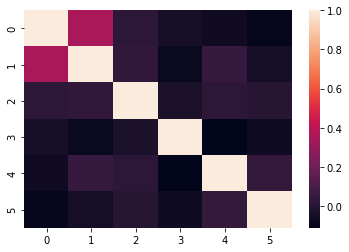

In [152]:
sb.heatmap(correlation)

It's not necessary to drop any feature in this case

# Visualization

Before building any further models and entering the testing phase, let's have an actual look at this data set.

In [183]:
from sklearn.preprocessing import StandardScaler as SS
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [184]:
# create X_1 = the data points where y_tr == 1
X_1 = X_tr[y_tr == 1,:]
# create y_1 = the labels from y_tr corresponding to X_1.
y_1 = y_tr[y_tr == 1]
# create X_0 = a random sample of data points (to match the size of X_1) from X_tr_sel2 where y_tr == 0.
X_0 = X_tr[y_tr == 0,:][:y_tr.sum(),:]
# create y_0 = the labels from y_tr corresponding to X_0.
y_0 = y_tr[y_tr == 0][:y_tr.sum()]
# Join X_1 and X_0 together into X_bal
X_bal = np.vstack((X_1,X_0))
y_bal = np.vstack((y_1,y_0))

In [185]:
# Create the pipeline: standard scaler --> PCA --> t-SNE (reducing to 2 dimensions)
from sklearn.pipeline import Pipeline
pipe = Pipeline( [ ('sscaler', SS()),('pca', PCA()) ,('tsne', TSNE(n_components = 2))])

In [186]:
# Fit this pipeline to X_bal and y_bal
X_bal_pipe = pipe.fit_transform(X_bal)

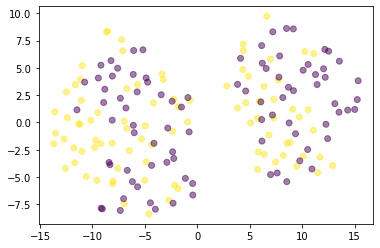

In [187]:
# Produce the resulting scatter plot
import matplotlib.pyplot as plt
plt.scatter(X_bal_pipe[:,0], X_bal_pipe[:,1], c = y_bal, alpha = 0.5)

# Building, testing, and validating

### Logistic Regression

In [158]:
from sklearn.linear_model import LogisticRegression

In [159]:
pipe = Pipeline( [ ('scaler', SS()),('pca', PCA()), ('logreg', LogisticRegression(solver = 'liblinear')) ] )

In [160]:
pipe.fit(X_tr, y_tr)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA()),
                ('logreg', LogisticRegression(solver='liblinear'))])

In [161]:
pipe.score(X_te, y_te)

0.6916666666666667

In [162]:
# Check the score when predicting admit result
pipe.score(X_te[pipe.predict(X_te) == 1], y_te[pipe.predict(X_te) == 1])

0.5294117647058824

In [163]:
# Check the score when predicting not-admit result
pipe.score(X_te[pipe.predict(X_te) == 0], y_te[pipe.predict(X_te) == 0])

0.7184466019417476

In [164]:
# Tools for K-fold cross validation.
from sklearn.model_selection import cross_val_score as CVS

In [165]:
# Run a K-fold cross validation on my pipeline
cv_scores = CVS(pipe, X_tr,y_tr, cv = 10)

In [166]:
# Interpret the mean of the validation scores array in context
cv_scores.mean()

0.7035714285714285

In [167]:
# Interpret the standard deviation of the validation scores array in context
cv_scores.std()

0.05986805219371503

### SVM

In [168]:
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC  
from sklearn.metrics import accuracy_score

In [169]:
X_std = SS().fit_transform(X) 

In [170]:
X_train, X_test, y_train, y_test  = TTS(X_std, y,test_size=0.3, random_state=325)

In [171]:
# defining parameter range 
param_grid = {'C': [0.01,0.02,0.03,0.05,0.07,0.08,0.1,0.2,0.3,0.5,0.7,0.9,1,10,20],               
              'kernel': ['linear']}  
grid = GridSearchCV(SVC(), param_grid, verbose = 0, cv=3, scoring='accuracy');
# fitting the model for grid search 
grid.fit(X_train, y_train);
svmBest = grid.best_estimator_
C_cv = grid.best_params_['C']
CscoreM = grid.cv_results_['mean_test_score']
CscoreS = grid.cv_results_['std_test_score']
svmBest = grid.best_estimator_
print(grid.best_estimator_) 

SVC(C=0.01, kernel='linear')


In [172]:
pipe2 = Pipeline( [('pca', PCA()), ('svc', SVC(C = 0.01)) ] )

In [173]:
pipe2.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA()), ('svc', SVC(C=0.01))])

In [174]:
pipe2.score(X_test, y_test)

0.6916666666666667

In [175]:
# Run a K-fold cross validation on my pipeline
cv_scores = CVS(pipe2, X_train,y_train, cv = 10)

In [176]:
cv_scores.mean()

0.6785714285714286

In [177]:
cv_scores.std()

0.0

### Random Forests

In [188]:
from sklearn.ensemble import RandomForestClassifier

In [190]:
param_grid = {
    "n_estimators": [50, 100,200,400],
    "criterion":( "gini", "entropy"), 
    "max_depth":([6, 12]), 
    "min_samples_split":[2, 4], 
    "min_samples_leaf":[2, 4], 
}
#Random forest classifier
clf = RandomForestClassifier(bootstrap=False,random_state=0)
tree_cv = GridSearchCV(estimator=clf, param_grid = param_grid, scoring="accuracy", n_jobs=-1, verbose=1, cv=10)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

Fitting 10 folds for each of 64 candidates, totalling 640 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100})


In [191]:
pipe3 = Pipeline( [ ('scaler', SS()),('pca', PCA()), ('randomforest', RandomForestClassifier(**best_params,random_state=0)) ] )

In [192]:
pipe3.fit(X_tr, y_tr)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA()),
                ('randomforest',
                 RandomForestClassifier(criterion='entropy', max_depth=6,
                                        min_samples_leaf=4, random_state=0))])

In [194]:
pipe3.score(X_te, y_te)

0.7

In [195]:
cv_scores = CVS(pipe3, X_tr,y_tr, cv = 10)

In [196]:
cv_scores.mean()

0.692857142857143

In [197]:
cv_scores.std()

0.05578749768504751

# Conclusion

The scores of all 3 models fluctuate from 0.68 to 0.7. These not-high-enough scores prove that reseach experience and some other effects still play an important role in graduate admmission besides our 6 features